In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline
import matplotlib.pyplot as plt

import warnings

# Filter or suppress warnings
warnings.filterwarnings('ignore')  # To ignore all warnings

In [2]:
# Load .env enviroment variables
load_dotenv(r"C:\Users\Oluwa\GITHUB\Resources\Keys.env.txt")
bitcoin=os.getenv("btc_url")
ethereum=os.getenv("eth_url")
ethereum

'https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD'

In [3]:
#Set Crypto API variables
bitties = requests.get(bitcoin)
ether = requests.get(ethereum)
btc_count=5
eth_count=21

In [4]:
#JSON the data needed out of the API and set is as a variable
if bitties.status_code == 200:
    data = bitties.json() 
    btc_price = data['data']['1']['quotes']['CAD']['price']
    print(f"The current value of bitcoin: {btc_price}")

if ether.status_code == 200:
    data = ether.json() 
    ether_price = data['data']['1027']['quotes']['CAD']['price']
    print(f"The current value of ethereum: {ether_price}")

The current value of bitcoin: 36104.8545
The current value of ethereum: 2163.832385


In [5]:
#Calculate the value of each currency in the wallet

wallet_eth= ether_price*eth_count
wallet_btc= btc_price*btc_count

print(f"The current value of eth in your wallet is {wallet_eth}")
print(f"The current value of btc in your wallet is {wallet_btc}")

The current value of eth in your wallet is 45440.480085
The current value of btc in your wallet is 180524.27250000002


In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpc=os.getenv("Alpaca_Key")
alpcshhh=os.getenv("Alpaca_Secret_Key")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpc,
    alpcshhh,
    api_version="v2")

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2023-09-21", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

In [9]:
# Get current price data as a Dataframe
close_prices= alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

#Index Dataframe by Symbol
close_prices.set_index('symbol', inplace=True)

#Drop unnecessary columns
close_prices.drop(columns=['high', 'low', 'volume', 'trade_count', 'vwap', 'open'], inplace=True)

In [10]:
#Separate ticker data
AGG_close= close_prices.at['AGG','close']
SPY_close=close_prices.at['SPY','close']

In [11]:
SPY_wallet= my_spy*SPY_close
AGG_wallet=my_agg*AGG_close

print(f"The current value of your {my_spy} SPY shares is ${SPY_wallet:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${AGG_wallet:0.2f}")

The current value of your 50 SPY shares is $21569.50
The current value of your 200 AGG shares is $18930.00


In [12]:
#Set Monthly Household Income
househld_mth= 4942

#Create Crypto Dataframe
Crypto_Data=pd.DataFrame({'symbol': ['BTC', 'ETH',],
        'owned': [btc_count, eth_count],'value': [wallet_btc, wallet_eth],'price': [btc_price, ether_price]})

#Index Dataframe by Symbol
Crypto_Data.set_index('symbol', inplace=True)

#Consolidate Alpaca Data
close_prices["value"]=[AGG_wallet, SPY_wallet]
close_prices["owned"]=[my_agg, my_spy]
close_prices.rename(columns={'close' : 'price'}, inplace=True)

In [13]:
#Combine Data
datacomb= pd.concat([close_prices, Crypto_Data],)
shares_sum = close_prices['value'].sum()
cry_sum= Crypto_Data['value'].sum()

#Create savings dataframe
savings_df=pd.DataFrame({'Account': ['shares', 'crypto'],
        'Balance': [shares_sum, cry_sum],})

#Index Dataframe by Account
savings_df.set_index('Account', inplace=True)

display(savings_df)
print(datacomb)

,Balance
Account,
shares,40499.500000
crypto,225964.752585


               price          value  owned
symbol                                    
AGG        94.650000   18930.000000    200
SPY       431.390000   21569.500000     50
BTC     36104.854500  180524.272500      5
ETH      2163.832385   45440.480085     21


([<matplotlib.patches.Wedge at 0x25c60c1d840>,
 [Text(0.9769683709202817, 0.5055025244460913, 'shares'),
  Text(-0.9769683945845616, -0.5055024787109004, 'crypto')])

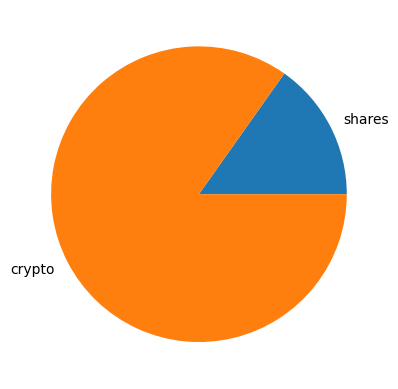

In [14]:
plt.pie(savings_df['Balance'], labels=savings_df.index)

In [15]:
#Set the ideal emergency fund
emergency_fund = househld_mth * 6

#Calculate the total amount of savings
all_sum= datacomb['value'].sum()

#Validate savings health
if all_sum >= emergency_fund:
    print ("Congratulations! You have enough money in your emergency fund.")
else:
    print("Looks like there isn't enough in your emergency fund. Call us to find out next steps!")

Congratulations! You have enough money in your emergency fund.


In [16]:
#PART 2 RETIREMENT PLANNING














# Set start and end dates of five years back from today.

start_date = pd.Timestamp('2018-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-09-22', tz='America/New_York').isoformat()

# Set timeframe to "5Years" for Alpaca API
timeframe_retirement = "1Day"


historical_shares= alpaca.get_bars(
    tickers,
    timeframe_retirement,
    start = start_date,
    end = end_date
).df

#Drop unnecessary columns
historical_shares.drop(columns=['high', 'low', 'volume', 'trade_count', 'vwap', 'open'], inplace=True)

# Separate ticker data
AGG_retire = historical_shares[historical_shares['symbol']=='AGG'].drop('symbol', axis=1)
SPY_retire = historical_shares[historical_shares['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG_retire, SPY_retire],axis=1, keys=['AGG','SPY'])

# Display sample data
df_portfolio

,AGG,SPY
,close,close
timestamp,,
2018-05-01 04:00:00+00:00,105.67,264.96
2018-05-02 04:00:00+00:00,105.67,263.17
2018-05-03 04:00:00+00:00,105.79,262.59
2018-05-04 04:00:00+00:00,105.86,265.92
2018-05-07 04:00:00+00:00,105.81,266.92
...,...,...
2023-09-18 04:00:00+00:00,95.63,443.63
2023-09-19 04:00:00+00:00,95.35,442.71


In [17]:
# Configure a Monte Carlo simulation to forecast 30 years cumulative returns
Retire_returns = MCSimulation(
    portfolio_data = df_portfolio,
    num_simulation = 1000,
    num_trading_days = 252*30
)

# Run the simulation and get results
Retire_returns_out = Retire_returns.calc_cumulative_return()

print(Retire_returns_out)

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

<Axes: title={'center': '1000 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

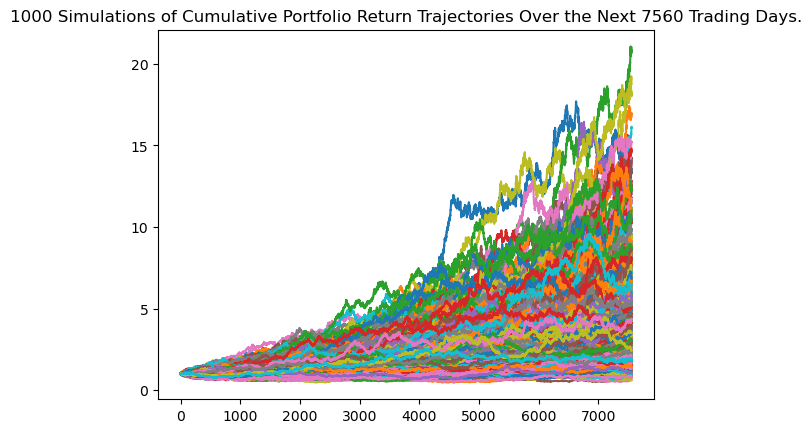

In [18]:
# Plot a diagram of cumulative returns
Retire_returns.plot_simulation()

In [19]:
#Create a 'mean' column that calculates the average cumulative returns
Retire_returns_out['mean'] = Retire_returns_out.mean(axis=1)

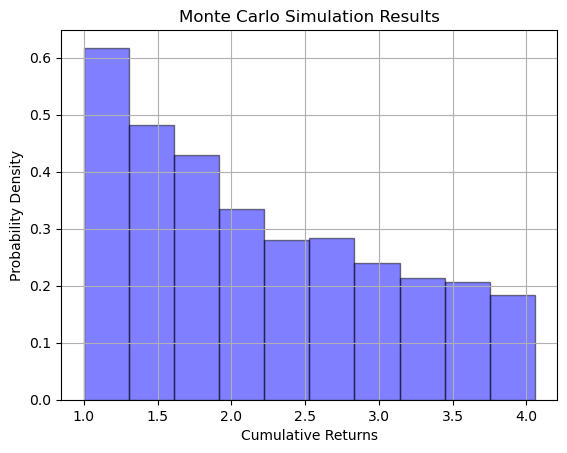

In [20]:
#Plot the probability distribution
plt.hist(Retire_returns_out['mean'], alpha=0.5, color='blue', edgecolor='black', density=True)
plt.title('Monte Carlo Simulation Results')
plt.xlabel('Cumulative Returns')
plt.ylabel('Probability Density')
plt.grid(True)

In [21]:
# Print summary stats
simulation_results = Retire_returns.summarize_cumulative_return()

simulation_results

count           1001.000000
mean               4.057670
std                2.561445
min                0.607432
25%                2.308080
50%                3.398179
75%                5.086760
max               20.999519
95% CI Lower       1.132624
95% CI Upper      10.998520
Name: 7560, dtype: float64

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower=(simulation_results["95% CI Lower"]*initial_investment)
ci_upper=(simulation_results["95% CI Upper"]*initial_investment)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:0,.2f} and ${ci_upper:0,.2f}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $22,652.47 and $219,970.39


In [23]:
# Set increased investment
increased_investment = 20000 * 1.5
ci_lower2=(simulation_results["95% CI Lower"]*increased_investment)
ci_upper2=(simulation_results["95% CI Upper"]*increased_investment)

# Print results
print(f"If you increase your investment size from ${initial_investment} to ${increased_investment} right now, there is a 95% chance that"
      f" over the next 30 years your account will end within the range of"
      f" ${ci_lower2:0,.2f} and ${ci_upper2:0,.2f}")

If you increase your investment size from $20000 to $30000.0 right now, there is a 95% chance that over the next 30 years your account will end within the range of $33,978.71 and $329,955.59


In [24]:
#OPTIONAL CHALLENGE - EARLY RETIREMENT



















